In [16]:
import time
import os

import numpy as np
import matplotlib.pyplot as plt

from multiprocessing import Pool
from glob import glob
from scipy.optimize import curve_fit

In [17]:
# import data
if __name__ ==  '__main__': 
    t0 = time.time()

    # load all scans of a one specimen
    data_dir = r"C:\Users\mie\Documents\GIT_Repositories\scan_analyze\result"
    npy_files = glob(os.path.join(data_dir, "*_hw.npy"))
    with Pool(processes=len(npy_files)) as pool:
        arr_list = pool.map(np.load, npy_files)

    # time
    print('read finished after: ' + str(np.round(time.time()-t0, 1)) + ' s')

    # Create an array containing heights from each array
    h_values = np.vstack([arr[0] for arr in arr_list])
    h_values = np.mean(h_values[:-2,1:],axis=1) # drop last 2 rows, drop 1st col

    # Create an array containing widths from each array
    w_values = np.vstack([arr[1] for arr in arr_list])
    w_values = np.mean(w_values[:-2,1:],axis=1) # drop last 2 rows, drop 1st col

read finished after: 0.6 s


# height

h = -0.8788* Q + 13.41* M + 1.09
Prediction: Q=1500 kJ/mm and M = 0.15 h = -1315.08 mm


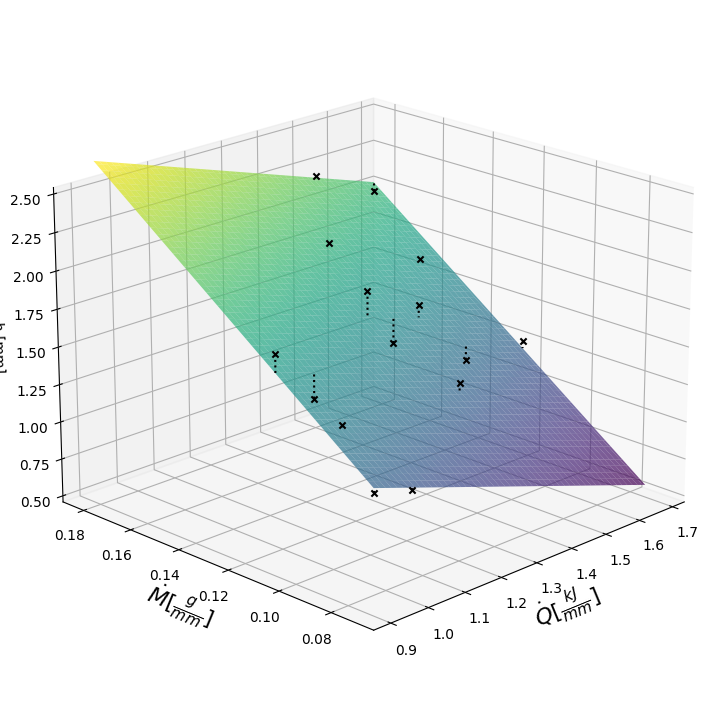

In [18]:
# Step 1: Collect the data
Q_values = np.array([1512,1680,1512,1680,911,1012,911,1012,1303,1448,1376,1376,1596,961,1376])/1000 # in kJ/mm
M_values = [0.12,0.12,0.181,0.181,0.072,0.072,0.109,0.109,0.13,0.13,0.104,0.156,0.15,0.091,0.13]

# Step 2: Define the function form
def polynomial_function(X, a, b, c):
    Q,M = X
    return a * Q + b * M + c

# Step 3: Fit the function to the data
popt, pcov = curve_fit(polynomial_function, (Q_values, M_values), h_values)
print('h = '+str(np.round(popt[0],4))+'* Q + '+ str(np.round(popt[1],2))+'* M + '+str(np.round(popt[2],2)))

# Step 4: Create the function for 'h'
def calculate_h(Q, M):
    a, b, c = popt
    return polynomial_function((Q, M), a, b, c)

# Example usage
input_Q = 1500
input_M = 0.15
output_h = calculate_h(input_Q, input_M)
print('Prediction: Q='+str(input_Q)+' kJ/mm and M = '+str(input_M)+ ' h = '+ str(np.round(output_h,2)) +' mm')

# Generate points for plotting the curve fit
Q_fit = np.linspace(min(Q_values), max(Q_values), 100)
M_fit = np.linspace(min(M_values), max(M_values), 100)
Q_fit, M_fit = np.meshgrid(Q_fit, M_fit)
h_fit = calculate_h(Q_fit, M_fit)

# Plotting the original data, the prediction, and the curve fit
fig = plt.figure(figsize=(4.24*3,3*3))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
ax.plot_surface(Q_fit, M_fit, h_fit, cmap='viridis', alpha=0.7, label='Curve Fit')
ax.scatter(Q_values, M_values, h_values, depthshade=False, c='k',marker='x', 
           label='Original Data')

ax.set_xlabel(r'$\dot Q [\frac{kJ}{mm}]$',fontsize=16)
ax.set_ylabel(r'$\dot M [\frac{g}{mm}]$',fontsize=16)
ax.set_zlabel('h [mm]')
ax.set_zlim([0.5,2.5])
ax.view_init(elev=2,azim=-160)
ax.view_init(elev=20,azim=-135)

# Adding dotted lines
for i in range(len(Q_values)):
    ax.plot([Q_values[i], Q_values[i]], # x 
            [M_values[i], M_values[i]], # y
            [h_values[i], calculate_h(Q_values[i], M_values[i])], # z
            color='k', linestyle='dotted')

plt.show()

# width

w = 5.5028* Q + -7.86* M + 1.78


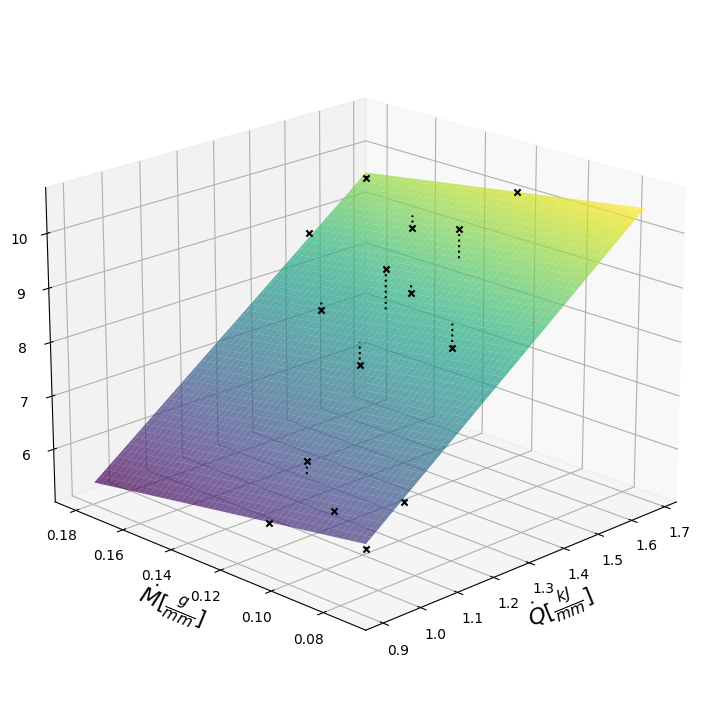

In [19]:
# Step 3: Fit the function to the data
popt, pcov = curve_fit(polynomial_function, (Q_values, M_values), w_values)
print('w = '+str(np.round(popt[0],4))+'* Q + '+ str(np.round(popt[1],2))+'* M + '+str(np.round(popt[2],2)))

# Step 4: Create the function for 'w'
def calculate_w(Q, M):
    a, b, c = popt
    return polynomial_function((Q, M), a, b, c)

# Generate points for plotting the curve fit
w_fit = calculate_w(Q_fit, M_fit)

# Plotting the original data, the prediction, and the curve fit
fig = plt.figure(figsize=(4.24*3,3*3))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
ax.plot_surface(Q_fit, M_fit, w_fit, cmap='viridis', alpha=0.7, label='Curve Fit')
ax.scatter(Q_values, M_values, w_values, depthshade=False, c='k',marker='x', 
           label='Original Data')
ax.set_xlabel(r'$\dot Q [\frac{kJ}{mm}]$',fontsize=16)
ax.set_ylabel(r'$\dot M [\frac{g}{mm}]$',fontsize=16)
ax.set_zlabel('w [mm]')
ax.view_init(elev=20,azim=-135)
# ax.view_init(elev=2,azim=-150)

# Adding dotted lines
for i in range(len(Q_values)):
    ax.plot([Q_values[i], Q_values[i]], # x 
            [M_values[i], M_values[i]], # y
            [w_values[i], calculate_w(Q_values[i], M_values[i])], # z
            color='k', linestyle='dotted')

plt.show()